모델 학습 완료
정확도: 1.0


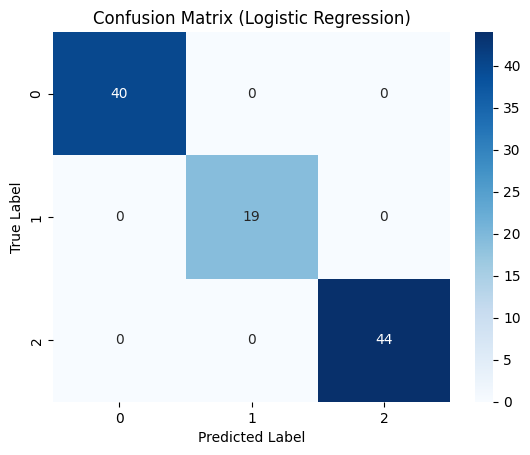

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
df = pd.read_csv("/content/penguins_lter.csv")

df_cls = df[['Culmen Length (mm)','Culmen Depth (mm)',
             'Flipper Length (mm)','Body Mass (g)','Species']].dropna()

X_cls = df_cls[['Culmen Length (mm)','Culmen Depth (mm)',
                'Flipper Length (mm)','Body Mass (g)']]

y_cls = df_cls['Species']

# species를 숫자 인코딩 하기
le = LabelEncoder()
y_enc = le.fit_transform(y_cls)

# 데이터 분할하기
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_enc, test_size=0.3)

# 데이터 스케일링 하기
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 로지스틱 회귀 분류 모델 생성
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sc, y_train)

print("모델 학습 완료")

# 예측
y_pred = clf.predict(X_test_sc)
print("정확도:", clf.score(X_test_sc,y_test))

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 히트맵으로 시각화
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()